In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset

dataset = pd.read_excel('Linear Regression.xlsx',sheet_name=0)
dataset.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


# 2) Regression model for bedrooms and price

In [3]:
# checking for any null values in bedrooms
dataset['bedrooms'].isna().sum()

0

In [4]:
# checking for any null values in price
dataset['price'].isna().sum()

0

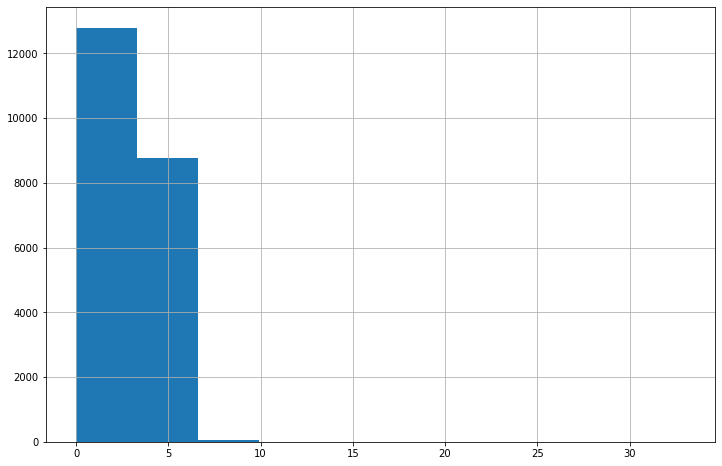

In [5]:
# determining density of records for different range of values for the Independent variable
dataset['bedrooms'].hist(figsize = (12,8))

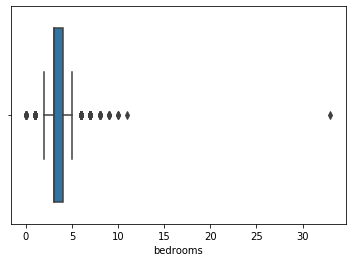

In [8]:
# outlier deduction for Independent variable
sns.boxplot(dataset['bedrooms'])


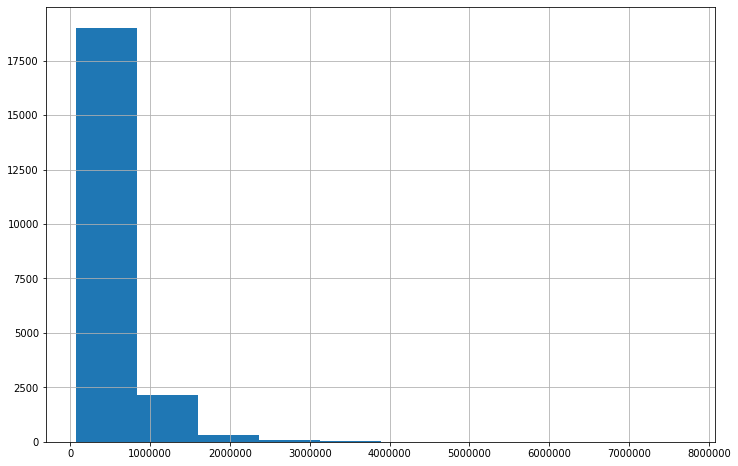

In [6]:
# determining density of records for different range of values for the Dependent variable
dataset['price'].hist(figsize = (12,8))

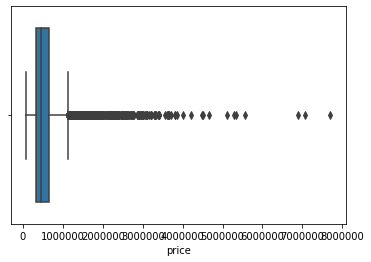

In [7]:
# outlier deduction for Dependent variable
sns.boxplot(dataset['price'])

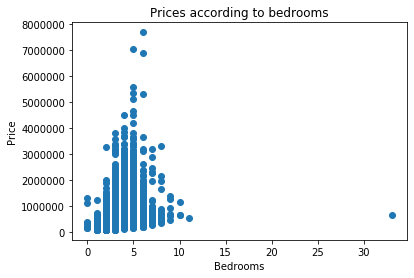

In [9]:
# determining correlation between the two variables

plt.scatter(dataset['bedrooms'],dataset['price'])
plt.title('Prices according to bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

In [10]:
# inference : positive correlation due to upward curve.
# Perfom calculations to justify observations

from scipy.stats import pearsonr

stats,p = pearsonr(dataset.bedrooms , dataset.price)
stats,p

(0.30834959788482247, 0.0)

In [11]:
# p (probability value for hypothesis testing is greater than o.o5)
# stats (r value (also called the correlation coeffecient is 0.03) ) hence moderate positive correlation

### split the records into x and y

In [15]:
x = dataset.iloc[:,2:3]
x.head()

,bedrooms
0,3
1,3
2,2
3,4
4,3


In [14]:
y = dataset.iloc[:,:1]
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


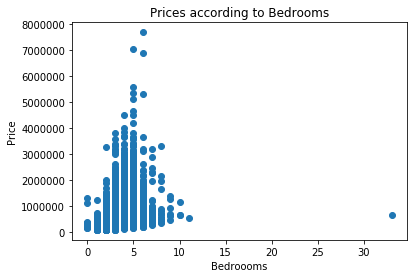

In [17]:
# re-visualizing dataset
plt.scatter(x,y)
plt.title('Prices according to Bedrooms')
plt.xlabel('Bedroooms')
plt.ylabel('Price')
plt.show()

### Split records for training and testing

In [20]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25 , random_state =  2 )
# allocated 25% of data for testing and 75% for training

In [21]:
x_train.shape

(16209, 1)

In [22]:
x_test.shape

(5404, 1)

In [23]:
y_train.shape

(16209, 1)

In [24]:
y_test.shape

(5404, 1)

### model building with sklearn

In [25]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# Model building is complete.Time to find slope and constant
print('The slope/co-effecient is ', lin_reg.coef_)
print('The constant/intercept is ' , lin_reg.intercept_)

The slope/co-effecient is  [[117235.27896102]]
The constant/intercept is  [144557.69610952]


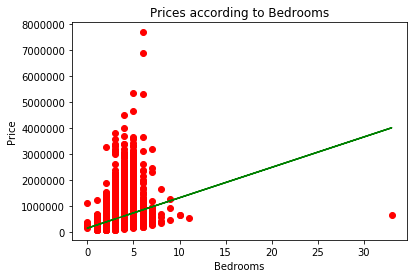

In [32]:
# visualizing training set result

plt.scatter(x_train,y_train , color = 'red')
plt.plot(x_train ,lin_reg.predict(x_train) , color ='green')
plt.title('Prices according to Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()



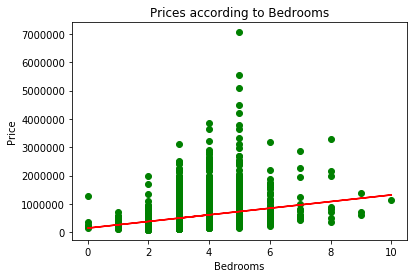

In [36]:
# visualizing testing set result

plt.scatter(x_test,y_test ,color = 'green')
plt.plot(x_test,lin_reg.predict(x_test) , color = 'red')
plt.title('Prices according to Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

### Testing the model

In [39]:
x_test.head()

,bedrooms
6638,4
7366,3
3158,2
9117,5
3392,2


In [40]:
y_test.head()

,price
6638,735000
7366,1150000
3158,350500
9117,860000
3392,122000


In [38]:
ypred = lin_reg.predict(x_test)
ypred

array([[613498.81195358],
       [496263.53299257],
       [379028.25403155],
       ...,
       [496263.53299257],
       [379028.25403155],
       [496263.53299257]])

### Estimating cost

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

RMSE = np.sqrt(mean_squared_error(y_test,ypred))
r_square = r2_score(y_test,ypred)

print('The R square value is....' ,r_square)
print('The RMSE value is...',RMSE)

The R square value is.... 0.10435010471063455
The RMSE value is... 363766.28914791247


In [43]:
# Poor model perfommance